In [1]:
# Clone model
#!git clone https://github.com/fizyr/keras-retinanet.git

In [2]:
# Go to retinanet folder
%cd ./keras-retinanet/
!ls

/Users/davidrestrepo/Object Detection/object_detection/HandDetectRetinaNet/keras-retinanet
CONTRIBUTORS.md      classes.csv          setup.cfg
LICENSE              examples             setup.py
README.md            images               snapshots
annotations.csv      keras_retinanet      tests
annotations_test.csv requirements.txt


In [3]:
# Setup enviorment
!pip install . --user

Processing /Users/davidrestrepo/Object Detection/object_detection/HandDetectRetinaNet/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp39-cp39-macosx_11_0_arm64.whl size=122797 sha256=f866806f57b574c17ddf8c8a26505008f748f627f06a2482e2b7dcc99fdcf52c
  Stored in directory: /Users/davidrestrepo/Library/Caches/pip/wheels/e6/11/43/d767119fdcc2b2d45c0268b34fbb1ebab5a5414bc3d749953d
Successfully built keras-retinanet
  Attempting uninstall: keras-retinanet
    Found existing installation: keras-retinanet 1.0.0
    Uninstalling keras-retinanet-1.0.0:
      Successfully

In [11]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/Users/davidrestrepo/.local/lib/python3.9/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /Users/davidrestrepo/Object Detection/object_detection/HandDetectRetinaNet/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.macosx-11.1-arm64-3.9
creating build/temp.macosx-11.1-arm64-3.9/keras_retinanet
creating build/temp.macosx-11.1-arm64-3.9/keras_retinanet/utils
clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /Users/davidrestrepo/miniforge3/envs/object_detection_test/include -arch arm64 -I/Users/davidrestrepo/miniforge3/envs/object_detection_test/include -f

In [4]:
# Copy the files from for training
!cp -r "../images" .
!cp -r "../annotations.csv" .
!cp -r "../annotations_test.csv" .
!cp -r "../classes.csv" .

In [5]:
!pip install seaborn
!pip install Pillow

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

In [7]:
from tensorflow.keras.models import load_model
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# Download Pre-train model

In [17]:
# From: https://github.com/fizyr/keras-retinanet/releases
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, './snapshots/model.h5')

('./snapshots/model.h5', <http.client.HTTPMessage at 0x290cabbe0>)

In [18]:
!chmod 777 keras_retinanet/bin/*
#!retinanet-debug csv annotations.csv classes.csv
#!keras_retinanet/bin/debug.py csv annotations.csv classes.csv

# Train model

In [30]:
annotations_train = pd.read_csv('annotations.csv')
instances_train = len(annotations_train)

batch = 8
steps_per_epoch = instances_train//batch
print(f'The number of images are: {instances_train}')
print(f'steps for a batch size of {batch_size} are: {steps_per_epoch}')

The number of images are: 185
steps for a batch size of 8 are: 23


In [33]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights snapshots/model.h5 --batch-size 8 --steps 23 --epochs 50 csv annotations.csv classes.csv

Creating model, this may take a second...
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

2022-04-24 16:48:52.711319: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 16:48:52.711403: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/davidrestrepo/miniforge3/envs/object_detection_test/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type

2022-04-24 16:48:54.828112: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
Epoch 1/50
2022-04-24 16:48:57.242232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
23/23 [==============================] - ETA: 0s - loss: 3.0837 - regression_loss: 1.9565 - classification_loss: 1.1272
Epoch 1: saving model to ./snapshots/resnet50_csv_01.h5
23/23 [==============================] - 81s 3s/step - loss: 3.0837 - regression_loss: 1.9565 - classification_loss: 1.1272 - lr: 1.0000e-05
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 2.7518 - regression_loss: 1.7387 - classification_loss: 1.0131
Epoch 2: saving model to ./snapshots/resnet50_csv_02.h5
23/23 [==============================] - 78s 3s/step - loss: 2.7518 - regression_loss: 1.7387 - classification_loss: 1.0131 - lr: 1.0000e-05
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 

23/23 [==============================] - ETA: 0s - loss: 0.8366 - regression_loss: 0.7110 - classification_loss: 0.1256
Epoch 25: saving model to ./snapshots/resnet50_csv_25.h5
23/23 [==============================] - 118s 5s/step - loss: 0.8366 - regression_loss: 0.7110 - classification_loss: 0.1256 - lr: 1.0000e-05
Epoch 26/50
23/23 [==============================] - ETA: 0s - loss: 0.8698 - regression_loss: 0.7398 - classification_loss: 0.1300
Epoch 26: saving model to ./snapshots/resnet50_csv_26.h5
23/23 [==============================] - 116s 5s/step - loss: 0.8698 - regression_loss: 0.7398 - classification_loss: 0.1300 - lr: 1.0000e-05
Epoch 27/50
23/23 [==============================] - ETA: 0s - loss: 0.8221 - regression_loss: 0.6912 - classification_loss: 0.1309
Epoch 27: saving model to ./snapshots/resnet50_csv_27.h5
23/23 [==============================] - 122s 5s/step - loss: 0.8221 - regression_loss: 0.6912 - classification_loss: 0.1309 - lr: 1.0000e-05
Epoch 28/50
23/23 [

Epoch 49/50
23/23 [==============================] - ETA: 0s - loss: 0.7233 - regression_loss: 0.6349 - classification_loss: 0.0884
Epoch 49: saving model to ./snapshots/resnet50_csv_49.h5
23/23 [==============================] - 112s 5s/step - loss: 0.7233 - regression_loss: 0.6349 - classification_loss: 0.0884 - lr: 1.0000e-09
Epoch 50/50
23/23 [==============================] - ETA: 0s - loss: 0.7165 - regression_loss: 0.6191 - classification_loss: 0.0973
Epoch 50: saving model to ./snapshots/resnet50_csv_50.h5

Epoch 50: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.
23/23 [==============================] - 113s 5s/step - loss: 0.7165 - regression_loss: 0.6191 - classification_loss: 0.0973 - lr: 1.0000e-09


# Load the model

In [42]:
# Take the last model
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# Load the model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

snapshots/resnet50_csv_50.h5


# Load test data

In [43]:
# Read csv file with classes
labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()

# Read csv file with test instances
test_df = pd.read_csv("annotations_test.csv")
test_df.head()

,images/149.png,71,127,121,193,left
0,images/57.png,35,33,213,196,left
1,images/49.png,16,15,201,224,left
2,images/84.png,68,17,224,172,left
3,images/198.png,89,52,148,131,left
4,images/203.png,144,80,206,158,left


# Generate predictions over test data

In [63]:
import skimage.io as io

# Generate predictions using the loaded model
def predict(image):
    # Image preprocessing
    image = preprocess_image(image.copy())
    image, scale = resize_image(image)
    # Generate the prediction using the model
    
    boxes, scores, labels = model.predict_on_batch(
        np.expand_dims(image, axis=0)
      )
    print('---')
    # Re-scale boxes
    boxes /= scale
    # Return output
    return boxes, scores, labels

In [64]:
# Show objects
# Just take into account objects umbralScore higher than the defined
umbralScore = 0.8

def draw_detections(image, boxes, scores, labels):
    # Take the list of objects in the image
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # Check that Umbral Score is more or equal than the defiend
        if score < umbralScore:
            break
        # Assign a color based in the label
        color = label_color(label)
        # Create the box and print the box over the image
        b = box.astype(int)
        draw_box(image, b, color=color)
        # Draw the class on the image
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(image, b, caption)


images/57.png 0
---


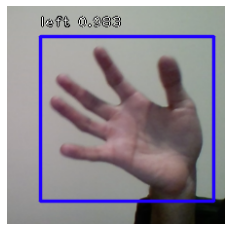

images/49.png 1


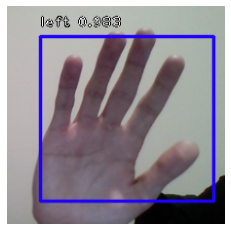

images/84.png 2
---


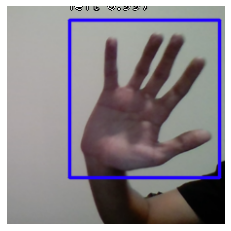

images/198.png 3


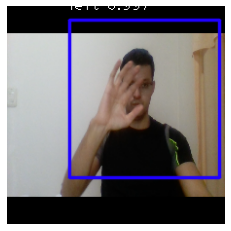

images/203.png 4


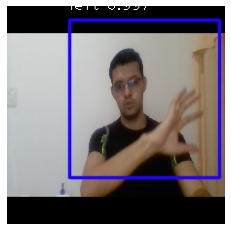

images/92.png 5
---


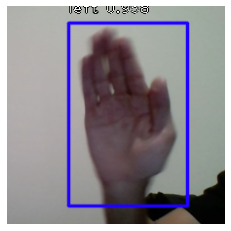

images/58.png 6
---


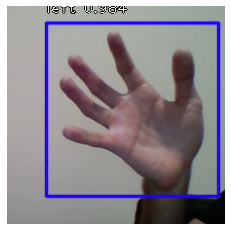

images/201.png 7
---


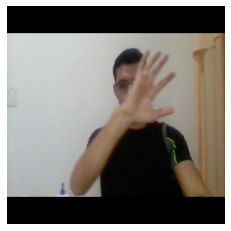

images/11.png 8
---


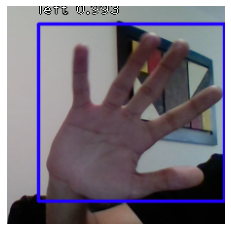

images/112.png 9


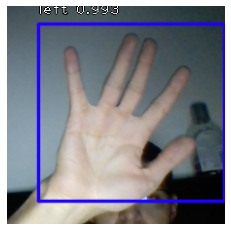

images/132.png 10


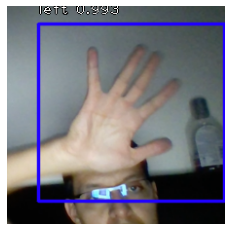

images/33.png 11
---


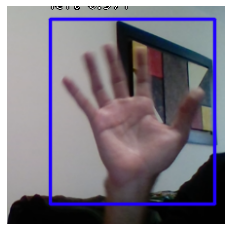

images/121.png 12
---


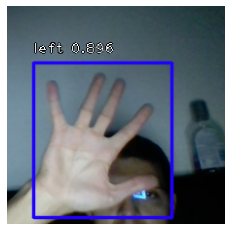

images/22.png 13
---


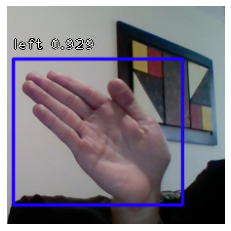

images/96.png 14
---


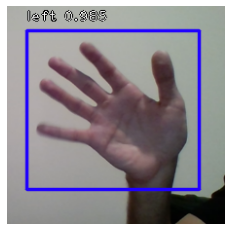

images/20.png 15
---


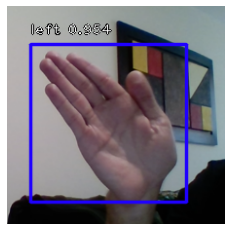

images/172.png 16


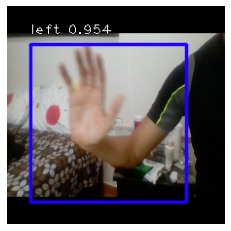

images/199.png 17
---


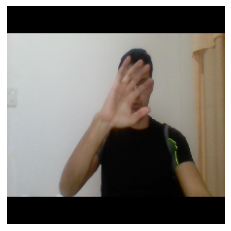

images/188.png 18


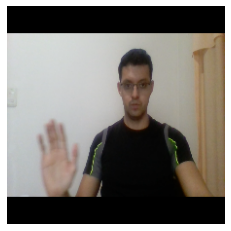

images/170.png 19


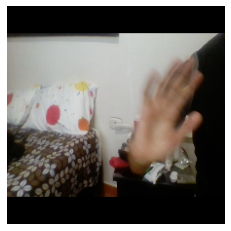

images/51.png 20


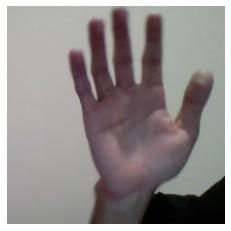

images/147.png 21
---


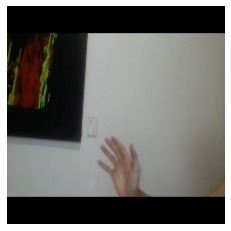

images/5.png 22


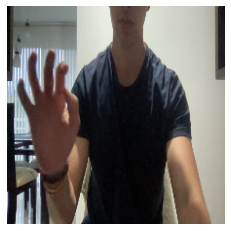

images/107.png 23


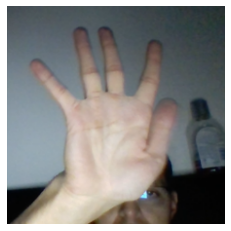

images/100.png 24


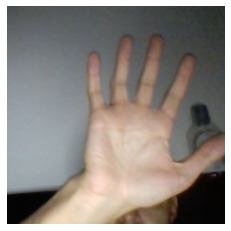

images/138.png 25
---


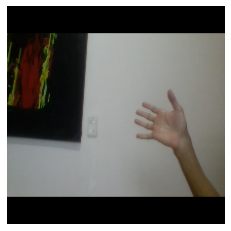

images/60.png 26
---


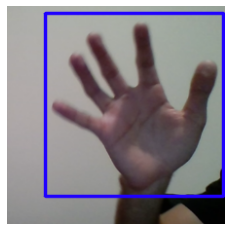

images/98.png 27
---


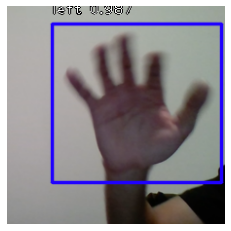

images/130.png 28
---


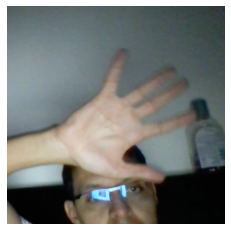

images/141.png 29
---


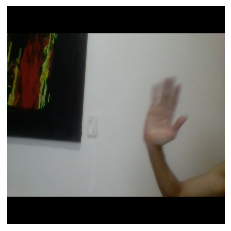

images/28.png 30
---


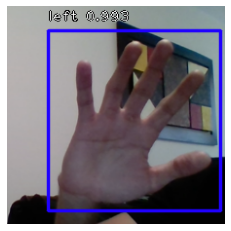

images/131.png 31
---


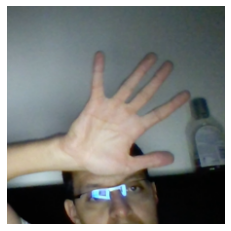

images/218.png 32


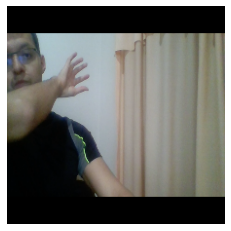

images/94.png 33
---


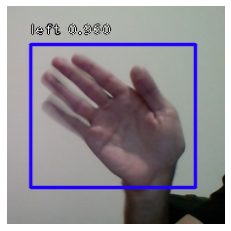

images/53.png 34
---


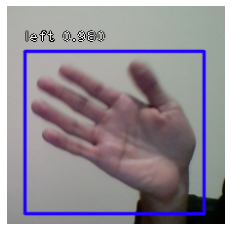

images/217.png 35


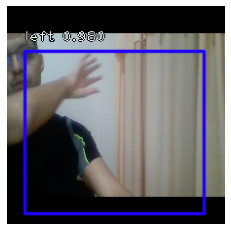

images/25.png 36
---


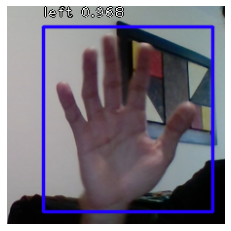

images/81.png 37
---


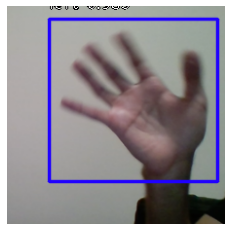

images/212.png 38
---


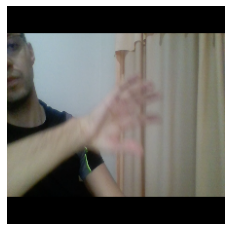

images/54.png 39
---


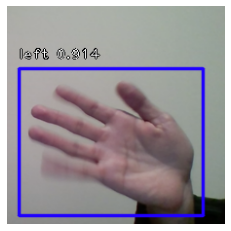

images/146.png 40
---


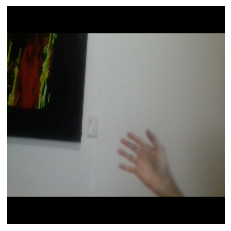

images/214.png 41


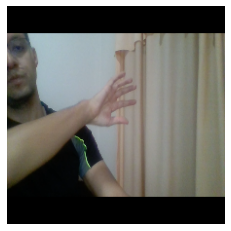

images/61.png 42
---


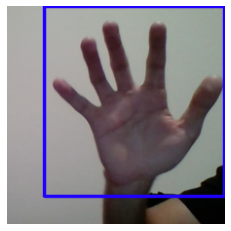

images/76.png 43
---


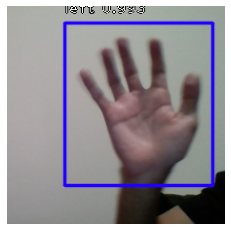

images/75.png 44


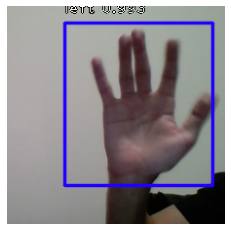

images/194.png 45


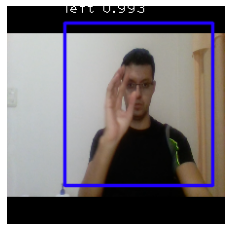

In [67]:
# For each image in test data
for index, row in test_df.iterrows():
    # Read the image
    print(row[0], index)
    image = io.imread(row[0])
    
    
    # Generate predictions
    try:
        boxes, scores, labels = predict(image)
    except:        
        # Draw the predictions over the image
        draw = image.copy()
        draw_detections(draw, boxes, scores, labels)
        # Show the image
        plt.axis('off')
        plt.imshow(draw)
        plt.show()
        continue
        
    # Draw the predictions over the image
    draw = image.copy()
    draw_detections(draw, boxes, scores, labels)
    
    # Show the image
    plt.axis('off')
    plt.imshow(draw)
    plt.show()